In [1]:
import pandas as pd
file_path= 'C:/Users/ramya/OneDrive/Desktop/dataMining/breast_cancer.csv'
df=pd.read_csv('C:/Users/ramya/OneDrive/Desktop/dataMining/breast_cancer.csv')
df.head()

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [2]:
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 699
Number of columns: 11


In [3]:
null_values = df.isnull()
null_counts = df.isnull().sum()

# Print the result
print(null_counts)

Sample code                    0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [4]:
import numpy as np
# replacing the ? will null value
df['Bare Nuclei'] = df['Bare Nuclei'].replace('?', np.nan)

In [5]:
# new count of null values
null_values = df.isnull()
null_counts = df.isnull().sum()

# Print the result
print(null_counts)

Sample code                     0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


In [6]:
# handling null values by replacing the null value as median of the column
median_value = df['Bare Nuclei'].median()

# Fill null values with the median
df['Bare Nuclei'].fillna(median_value, inplace=True)

In [7]:
#checking whether the null vales replaced?
print(df[20:27])

    Sample code  Clump Thickness  Uniformity of Cell Size  \
20      1054590                7                        3   
21      1054593               10                        5   
22      1056784                3                        1   
23      1057013                8                        4   
24      1059552                1                        1   
25      1065726                5                        2   
26      1066373                3                        2   

    Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
20                         2                 10                            5   
21                         5                  3                            6   
22                         1                  1                            2   
23                         5                  1                            2   
24                         1                  1                            2   
25                         3   

In [8]:
unique_values = df.nunique()

# Initialize empty lists for min and max values
min_values = []
max_values = []

# Loop through each column to calculate min and max values
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        min_val = df[col].min()
        max_val = df[col].max()
    else:
        min_val = np.nan
        max_val = np.nan
    min_values.append(min_val)
    max_values.append(max_val)

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes,
    'Unique Values': unique_values,
    'Min': min_values,
    'Max': max_values
})
summary_df.reset_index(drop=True, inplace=True)
# Print the summary DataFrame
print(summary_df)

                    Column Name Data Type  Unique Values      Min         Max
0                   Sample code     int64            645  61634.0  13454352.0
1               Clump Thickness     int64             10      1.0        10.0
2       Uniformity of Cell Size     int64             10      1.0        10.0
3      Uniformity of Cell Shape     int64             10      1.0        10.0
4             Marginal Adhesion     int64             10      1.0        10.0
5   Single Epithelial Cell Size     int64             10      1.0        10.0
6                   Bare Nuclei    object             11      NaN         NaN
7               Bland Chromatin     int64             10      1.0        10.0
8               Normal Nucleoli     int64             10      1.0        10.0
9                       Mitoses     int64              9      1.0        10.0
10                        Class     int64              2      2.0         4.0


In [9]:
# creating a function
def generate_summary_stats(df):
   
    unique_values = df.nunique()

    min_values = []
    max_values = []

   
    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.number):
            min_val = df[col].min()
            max_val = df[col].max()
        else:
            min_val = np.nan
            max_val = np.nan
        min_values.append(min_val)
        max_values.append(max_val)

   
    summary_df = pd.DataFrame({
        'Column Name': df.columns,
        'Data Type': df.dtypes,
        'Unique Values': unique_values,
        'Min': min_values,
        'Max': max_values
    })
    summary_df.reset_index(drop=True, inplace=True)

    return summary_df

print(summary_df)

                    Column Name Data Type  Unique Values      Min         Max
0                   Sample code     int64            645  61634.0  13454352.0
1               Clump Thickness     int64             10      1.0        10.0
2       Uniformity of Cell Size     int64             10      1.0        10.0
3      Uniformity of Cell Shape     int64             10      1.0        10.0
4             Marginal Adhesion     int64             10      1.0        10.0
5   Single Epithelial Cell Size     int64             10      1.0        10.0
6                   Bare Nuclei    object             11      NaN         NaN
7               Bland Chromatin     int64             10      1.0        10.0
8               Normal Nucleoli     int64             10      1.0        10.0
9                       Mitoses     int64              9      1.0        10.0
10                        Class     int64              2      2.0         4.0


In [10]:
#TASK-2
file_path= 'C:/Users/ramya/OneDrive/Desktop/dataMining/ds_salaries.csv'
data=pd.read_csv('C:/Users/ramya/OneDrive/Desktop/dataMining/ds_salaries.csv')
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [11]:
num_rows, num_cols = data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 3755
Number of columns: 11


In [12]:
total_attributes = len(data.columns)

# Select the numeric (continuous) columns in the DataFrame
numeric_columns = data.select_dtypes(include=[np.number])

# Count how many numeric columns there are
num_numeric_attributes = len(numeric_columns.columns)

# Select the columns that are not numeric (discrete)
discrete_columns = data.select_dtypes(exclude=[np.number])

# Count how many discrete columns there are
num_discrete_attributes = len(discrete_columns.columns)

# Print the results
print(f"Total number of attributes: {total_attributes}")
print(f"Number of numeric attributes: {num_numeric_attributes}")
print(f"Number of discrete attributes: {num_discrete_attributes}")


Total number of attributes: 11
Number of numeric attributes: 4
Number of discrete attributes: 7


In [13]:
# without function 
column_info = data.dtypes

# Get unique values for each column
unique_values = data.nunique()

# Initialize empty lists for min and max values
min_values = []
max_values = []

# Loop through each column to calculate min and max values
for col in data.columns:
    if np.issubdtype(data[col].dtype, np.number):
        min_val = data[col].min()
        max_val = data[col].max()
    else:
        min_val = np.nan
        max_val = np.nan
    min_values.append(min_val)
    max_values.append(max_val)

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Column Name': data.columns,
    'Data Type': data.dtypes,
    'Unique Values': unique_values,
    'Min': min_values,
    'Max': max_values
})
summary_df.reset_index(drop=True, inplace=True)
# Print the summary DataFrame
print(summary_df)

           Column Name Data Type  Unique Values     Min         Max
0            work_year     int64              4  2020.0      2023.0
1     experience_level    object              4     NaN         NaN
2      employment_type    object              4     NaN         NaN
3            job_title    object             93     NaN         NaN
4               salary     int64            815  6000.0  30400000.0
5      salary_currency    object             20     NaN         NaN
6        salary_in_usd     int64           1035  5132.0    450000.0
7   employee_residence    object             78     NaN         NaN
8         remote_ratio     int64              3     0.0       100.0
9     company_location    object             72     NaN         NaN
10        company_size    object              3     NaN         NaN


In [14]:
# Using the previous created Function
summary_df = generate_summary_stats(data)
print("Summary for Dataset:")
print(summary_df)

Summary for Dataset:
           Column Name Data Type  Unique Values     Min         Max
0            work_year     int64              4  2020.0      2023.0
1     experience_level    object              4     NaN         NaN
2      employment_type    object              4     NaN         NaN
3            job_title    object             93     NaN         NaN
4               salary     int64            815  6000.0  30400000.0
5      salary_currency    object             20     NaN         NaN
6        salary_in_usd     int64           1035  5132.0    450000.0
7   employee_residence    object             78     NaN         NaN
8         remote_ratio     int64              3     0.0       100.0
9     company_location    object             72     NaN         NaN
10        company_size    object              3     NaN         NaN


In [15]:
exp = data['experience_level'].unique()

# Print the unique job titles
for x in exp:
    print(x)

SE
MI
EN
EX


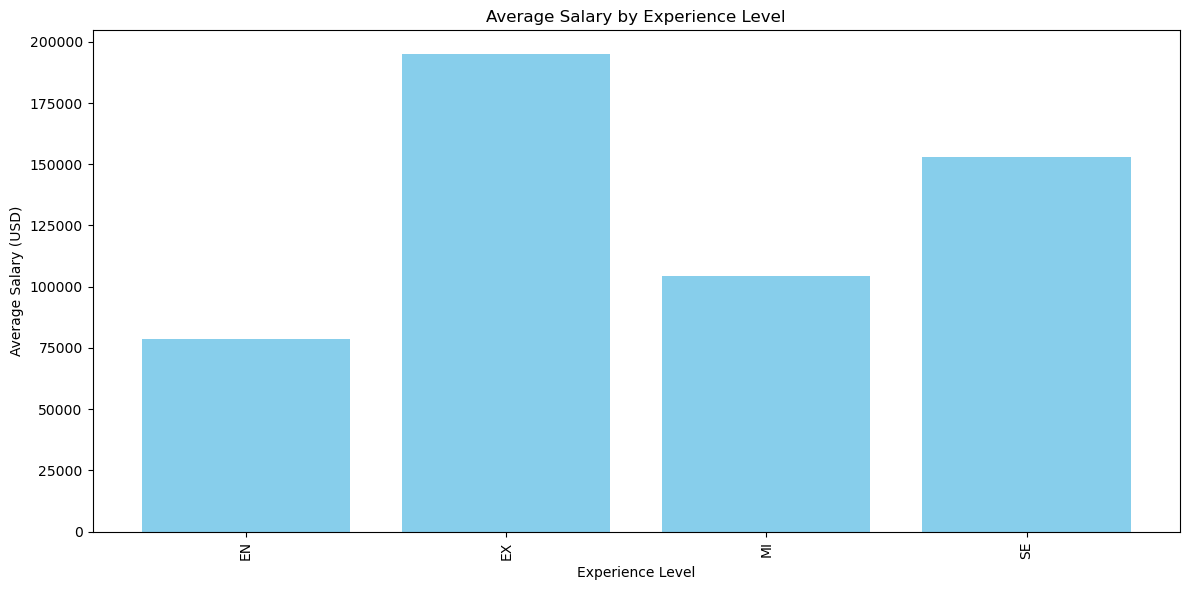

In [16]:
import matplotlib.pyplot as plt
average_salary_by_experience = data.groupby('experience_level')['salary_in_usd'].mean()

# Get the unique experience levels
unique_experience_levels = average_salary_by_experience.index

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(unique_experience_levels, average_salary_by_experience, color='skyblue')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Experience Level')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
unique_job_titles = data['job_title'].unique()

# Print the unique job titles
for title in unique_job_titles:
    print(title)
    

Principal Data Scientist
ML Engineer
Data Scientist
Applied Scientist
Data Analyst
Data Modeler
Research Engineer
Analytics Engineer
Business Intelligence Engineer
Machine Learning Engineer
Data Strategist
Data Engineer
Computer Vision Engineer
Data Quality Analyst
Compliance Data Analyst
Data Architect
Applied Machine Learning Engineer
AI Developer
Research Scientist
Data Analytics Manager
Business Data Analyst
Applied Data Scientist
Staff Data Analyst
ETL Engineer
Data DevOps Engineer
Head of Data
Data Science Manager
Data Manager
Machine Learning Researcher
Big Data Engineer
Data Specialist
Lead Data Analyst
BI Data Engineer
Director of Data Science
Machine Learning Scientist
MLOps Engineer
AI Scientist
Autonomous Vehicle Technician
Applied Machine Learning Scientist
Lead Data Scientist
Cloud Database Engineer
Financial Data Analyst
Data Infrastructure Engineer
Software Data Engineer
AI Programmer
Data Operations Engineer
BI Developer
Data Science Lead
Deep Learning Researcher
BI An

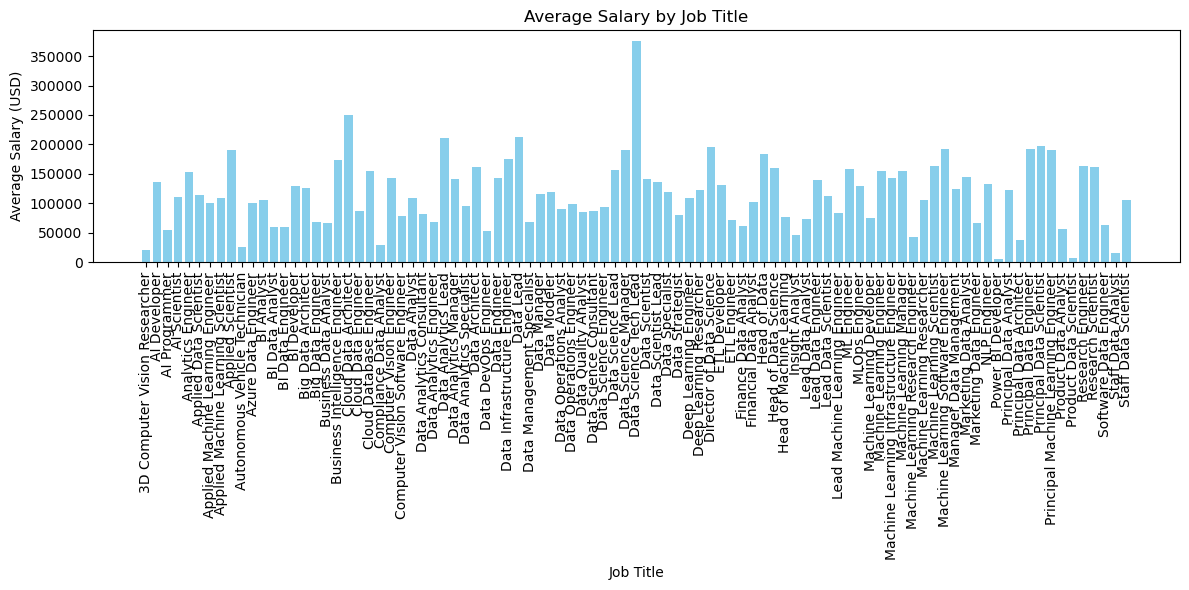

In [18]:
average_salary_by_job_title = data.groupby('job_title')['salary_in_usd'].mean()

# Get the unique job titles
unique_job_titles = average_salary_by_job_title.index

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(unique_job_titles, average_salary_by_job_title, color='skyblue')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Job Title')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
# Pre-processing
null_values = data.isnull()
null_counts = data.isnull().sum()

# Print the result
print(null_counts)

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


<Axes: >

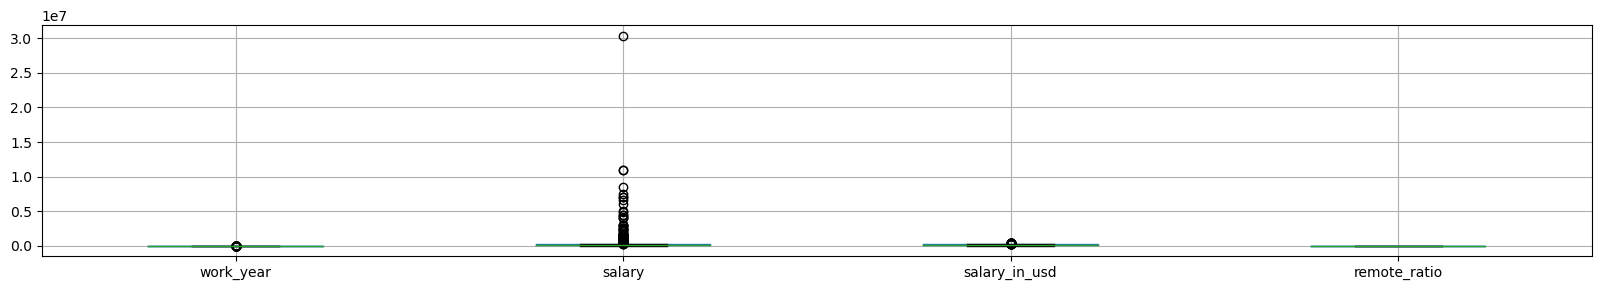

In [20]:
# Outliers
%matplotlib inline
data.boxplot(figsize=(20,3))

In [21]:
# dropping columns
cols=['salary','salary_currency']
data = data.drop(cols,axis=1)

In [22]:
# Duplicates handling
dup_count = data.duplicated()
print('Number of duplicate rows = %d' % (dup_count.sum()))

Number of duplicate rows = 1171


In [23]:
print(f"Number of rows before removing duplicates: {len(data)}")
data = data.drop_duplicates()
print(f"Number of rows after removing duplicates: {len(data)}")

Number of rows before removing duplicates: 3755
Number of rows after removing duplicates: 2584


In [24]:
num_rows, num_cols = data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 2584
Number of columns: 9


In [25]:
summary_df = generate_summary_stats(data)
print("Summary for Dataset:")
print(summary_df)

Summary for Dataset:
          Column Name Data Type  Unique Values     Min       Max
0           work_year     int64              4  2020.0    2023.0
1    experience_level    object              4     NaN       NaN
2     employment_type    object              4     NaN       NaN
3           job_title    object             93     NaN       NaN
4       salary_in_usd     int64           1035  5132.0  450000.0
5  employee_residence    object             78     NaN       NaN
6        remote_ratio     int64              3     0.0     100.0
7    company_location    object             72     NaN       NaN
8        company_size    object              3     NaN       NaN
